# Marketing Analysis

Name: Nguyen Vu Anh Quan

Email: aquan2111@gmail.com

# 1. Preminiraries

The file "marketing.csv" contains data used to analyze the influence of marketing of different forms on total revenue.

The dataset has 3 independent variables, which are the amounts of money that each company pays on different forms of marketing, which are television, social network, and newspaper; and 1 dependent variable - the total turnover of each company.

The dataset has 200 observaions, collected at 200 companies.

In [1]:
#install and load packages
install.packages("psych")
install.packages("car", dependencies = TRUE)
install.packages("tidyverse", dependencies = TRUE)
library(car)
library(psych)
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: carData


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::recode()  masks car::recode()
✖ purrr::some()    masks car::some()
ℹ Use the conflicted package (<http://confli

In [2]:
#read in the dataset
dataset <- read.csv("marketing.csv")
head(dataset)

,index,Television,Socia_Network,newspaper,Turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419
2,2,156.26,129.85,62.70,856.2597
3,3,124.38,187.57,140.04,964.9689
4,4,157.69,187.48,143.94,1017.4412
5,5,158.23,222.41,116.04,1115.2990
6,6,132.48,181.55,119.84,932.3739


In [3]:
dataset <- dataset %>%
  rename(
  Social_Network = Socia_Network,
  Newspaper = newspaper
  )

In [4]:
head(dataset)

,index,Television,Social_Network,Newspaper,Turnover
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,200.92,142.17,145.41,943.0419
2,2,156.26,129.85,62.70,856.2597
3,3,124.38,187.57,140.04,964.9689
4,4,157.69,187.48,143.94,1017.4412
5,5,158.23,222.41,116.04,1115.2990
6,6,132.48,181.55,119.84,932.3739


# 2. Dataset Analysis

Before testing which model is appropriate for predicting the impact of different forms of advertising to the revenue, we will first look at the relationship between variables.

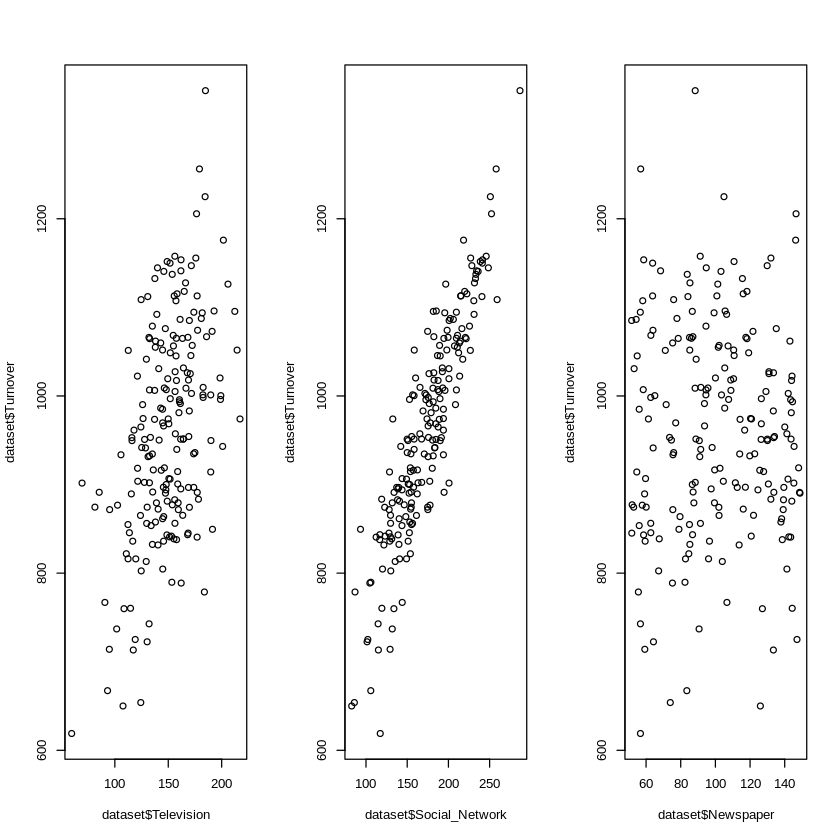

In [5]:
#observe the individual relationship between the turnover and the money paid for different forms of advertisement
op <- par(mfrow = c(1, 3))
plot(dataset$Turnover ~ dataset$Television)
plot(dataset$Turnover ~ dataset$Social_Network)
plot(dataset$Turnover ~ dataset$Newspaper)

It seems that the variable Turnover has linear relationship with the variables with Television and Socia_Network, while not with newspaper

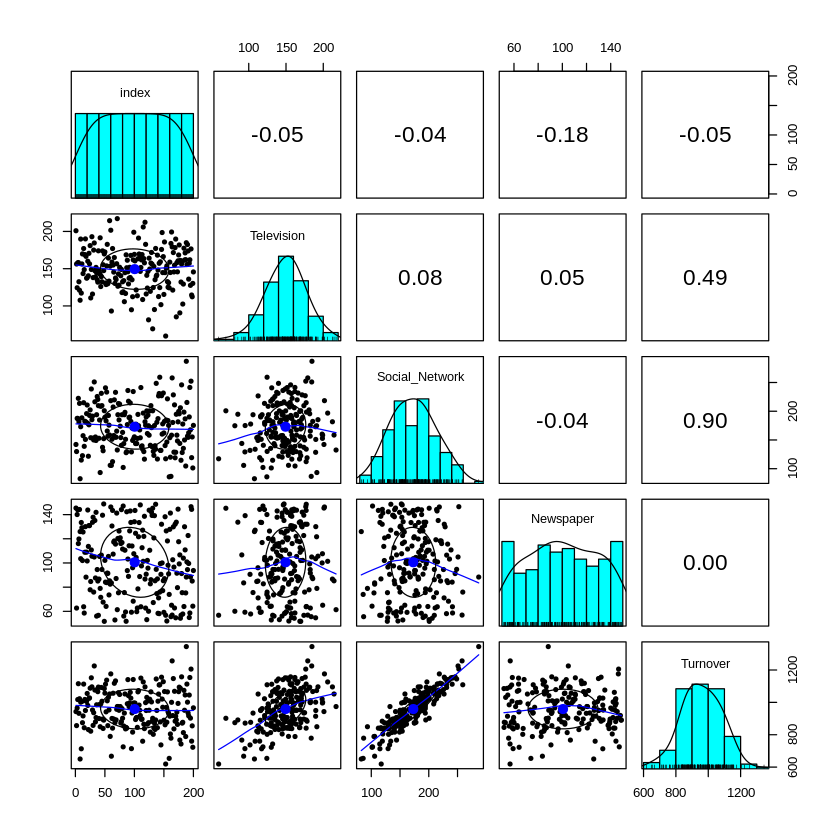

In [6]:
#observe the correlation between variables in the dataset
pairs.panels(dataset)

It can be seen that the money paid for social network advertising and the turnover are highly correlated, with a correlation coefficient of 0.90

We now perform correlation tests between variables with the hypotheses:

H0: no correlation

Ha: correlation exists

In [7]:
#Television vs Turnover
cor.test(dataset$Television, dataset$Turnover)
#p-value < 0.05 => Reject H0 => Correlation exists between Television and Turnover


	Pearson's product-moment correlation

data:  dataset$Television and dataset$Turnover
t = 7.8478, df = 198, p-value = 2.597e-13
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3735893 0.5862096
sample estimates:
      cor 
0.4870837 


In [8]:
#Socia_Network vs Turnover
cor.test(dataset$Social_Network, dataset$Turnover)
#p-value < 0.05 => Reject H0 => Correlation exists between Social_Network and Turnover


	Pearson's product-moment correlation

data:  dataset$Social_Network and dataset$Turnover
t = 29.591, df = 198, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8738405 0.9258309
sample estimates:
      cor 
0.9030928 


In [9]:
#newspaper vs Turnover
cor.test(dataset$Newspaper, dataset$Turnover)
#p-value > 0.05 => Retain H0 => No correlation between Newspaper and Turnover


	Pearson's product-moment correlation

data:  dataset$Newspaper and dataset$Turnover
t = -0.040811, df = 198, p-value = 0.9675
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.1415844  0.1358954
sample estimates:
         cor 
-0.002900308 


# 3. Test the models

We will take a look at different models that can be used to explain the relationship between turnover and marketing costs of different forms

We will first look at the simple linear regression model between turnover and other variables

In [10]:
#Turnover vs Television
model_television <- lm(Turnover ~ Television, data = dataset)
summary(model_television)


Call:
lm(formula = Turnover ~ Television, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-255.773  -77.986    6.763   72.171  307.943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 630.2766    42.5450  14.814  < 2e-16 ***
Television    2.1990     0.2802   7.848  2.6e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 107.4 on 198 degrees of freedom
Multiple R-squared:  0.2373,	Adjusted R-squared:  0.2334 
F-statistic: 61.59 on 1 and 198 DF,  p-value: 2.597e-13


P_value is 2.6 * 10^-13 < 0.05, meaning the linear relationship between Turnover and Television is statistically significant

The coefficient for Television is positive, meaning that an increase in costs for television advertisement will lead to a rise in turnover

Multiple R-squared of 0.2373 means that 23.73% of the variation of the turnover can be explained by the variation in television advertising costs, which can be seen as rather low

In [11]:
#Turnover vs Socia_Netwrok
model_social_network <- lm(Turnover ~ Social_Network, data = dataset)
summary(model_social_network)


Call:
lm(formula = Turnover ~ Social_Network, data = dataset)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.504  -32.874    2.386   34.283  134.180 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    467.45415   17.01935   27.47   <2e-16 ***
Social_Network   2.83909    0.09594   29.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.82 on 198 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.8146 
F-statistic: 875.6 on 1 and 198 DF,  p-value: < 2.2e-16


P-value very small (less than 2 * 10^-16), giving a highly significant linear relationship in terms of statistics

Positive Socia_Network coefficient meaning that paying more for advertising on social network will result in higher turnover

Multiple R-squared of 0.8156 shows that 81.56% of the variations in turnover is accountable to the changes in funds for social network



In [12]:
#Turnover vs newspaper
model_newspaper <- lm(Turnover ~ Newspaper, data = dataset)
summary(model_newspaper)


Call:
lm(formula = Turnover ~ Newspaper, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-340.36  -84.53   -5.69   92.89  385.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 960.0327    31.5268  30.451   <2e-16 ***
Newspaper    -0.0123     0.3014  -0.041    0.967    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 123 on 198 degrees of freedom
Multiple R-squared:  8.412e-06,	Adjusted R-squared:  -0.005042 
F-statistic: 0.001666 on 1 and 198 DF,  p-value: 0.9675


Very high p-value (0.967) shows that the linear relationship between revenue and newspaper advertising costs is not statistically significant

The first model we will examine is a multiple linear regression model involving all the costs for three forms of advertisement against revenue

In [13]:
full_model <- lm(Turnover ~ Television + Social_Network + Newspaper, data = dataset)
summary(full_model)


Call:
lm(formula = Turnover ~ Television + Social_Network + Newspaper, 
    data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.571  -9.826   0.581   9.575  40.175 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    202.19448    7.93632  25.477   <2e-16 ***
Television       1.86693    0.03832  48.714   <2e-16 ***
Social_Network   2.73133    0.02668 102.382   <2e-16 ***
Newspaper        0.04969    0.03590   1.384    0.168    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.62 on 196 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9858 
F-statistic:  4605 on 3 and 196 DF,  p-value: < 2.2e-16


The coefficient of the variable newspaper returns a p-value of 0.168 > 0.05. Hence, the presence of this variable is not statistically significant to the model. Although this model has a high R-squared value of 0.986, meaning that the variations in the marketing costs of the forms account for a high proportion of variation in the turnover, we will now attempt to remove newspaper out of the model, and test a new multiple linear regression model.

In [14]:
modified_model <- lm(Turnover ~ Television + Social_Network, data = dataset)
summary(modified_model)


Call:
lm(formula = Turnover ~ Television + Social_Network, data = dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.589  -9.631   0.468   9.658  38.351 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    207.06397    7.13046   29.04   <2e-16 ***
Television       1.86966    0.03836   48.74   <2e-16 ***
Social_Network   2.72971    0.02671  102.18   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.65 on 197 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9857 
F-statistic:  6875 on 2 and 197 DF,  p-value: < 2.2e-16


Both the coefficients of the two forms of advertisement return a very low p-value, meaning that both variables are statistically significant to the multiple linear regression model.

The multiple R-squared of this model is 0.9859, meaning that 98.6% of the variations in the turnover can be explained by the variations in television and social network advertising costs.

# 4. Evaluate the model

We will examine the model:

Turnover = 207.06397 + 1.86966 * Television + 2.72971 * Social_Network



In using a multiple linear regression model, we make four assumptions:

- Linearity

- Normality

- Zero residual mean

- Homodescanicity

- No collinearity

If linearity is reasonable, we expect to see random scatter about the zero line, which can be checked by looking at the red line on the plot close the zero line of the residual vs fitted plot.

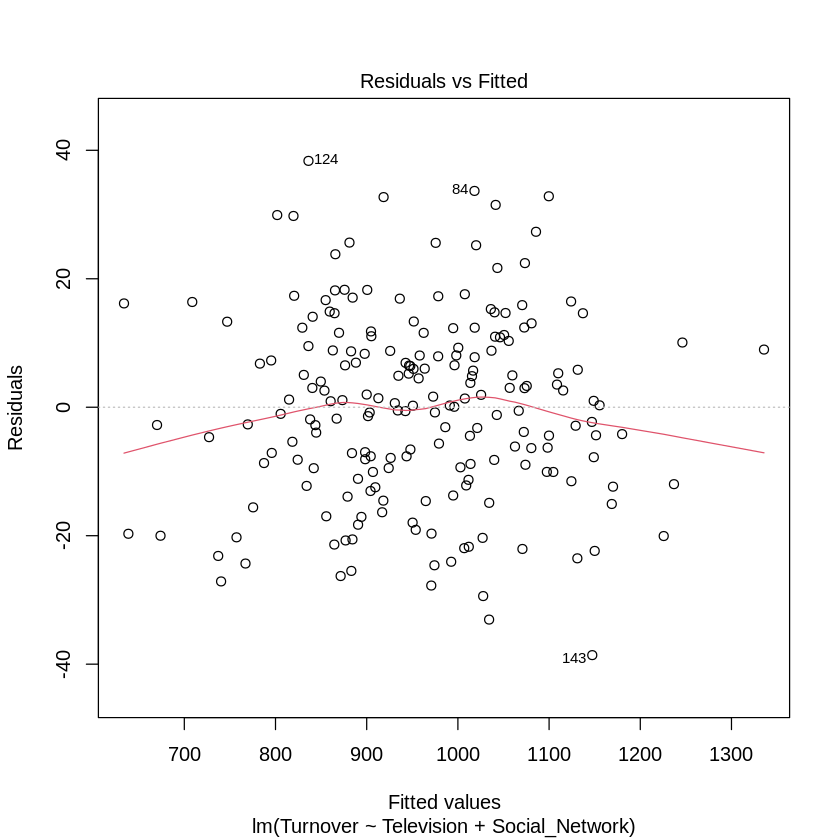

In [15]:
plot(modified_model, 1)

Although it is not too straight, the fact that the red line is close to the zero axis proves that there is linearity in this model.

In checking the assumption of normality, meaning that the residuals of the model are normally distributed, we can take a look at the normal Q-Q plot of the residuals. A straight line with the majority of points lying on or close to the line shows that the resiuals are normally distributed.

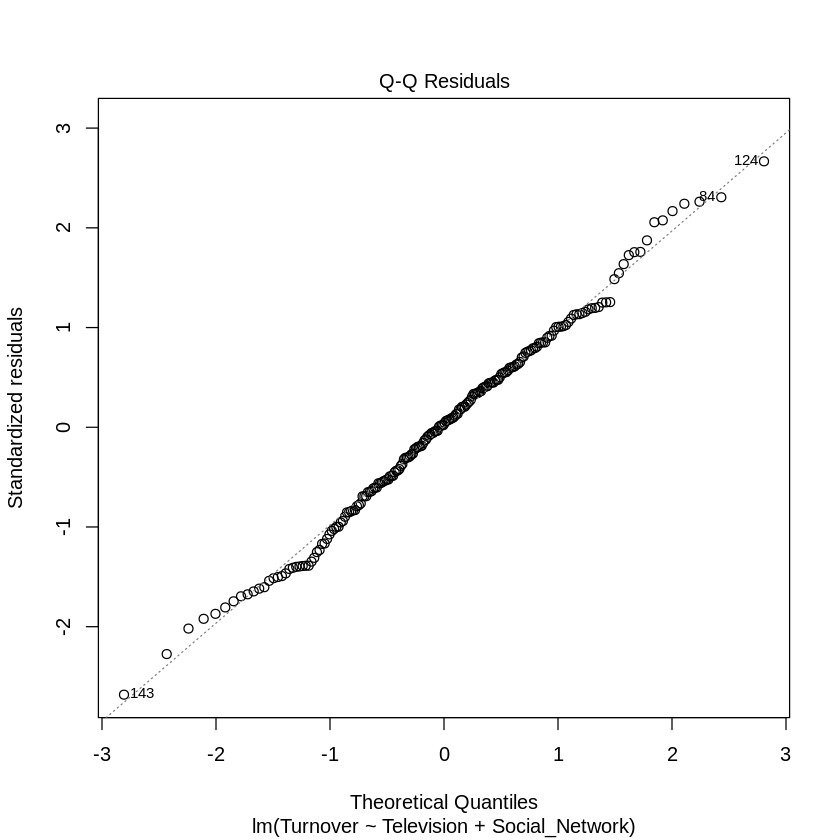

In [16]:
plot(modified_model, 2)

Most points lie closely to the straight line, showing that there is normality in the residuals.

A Shapiro test of the residuals model can also be used to test the normality of the residuals with the hypotheses:

H0: Normality

Ha: No normality

In [17]:
res <- resid(modified_model)
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.9945, p-value = 0.676


P-value > 0.05, so we retain H0. The residuals are normally distributed.

To test that the mean of the residuals is zero, we will perform a t-test, with the hypotheses:
H0: Mean is 0
Ha: Mean is not 0



In [18]:
t.test(res, mu = 0)


	One Sample t-test

data:  res
t = -1.73e-16, df = 199, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.032987  2.032987
sample estimates:
    mean of x 
-1.783556e-16 


P-value > 0.05. Hence, we retain H0. The assumption that mean of the residuals is zero can be justified.

As for the last assumption, homodescanicity, we will first observe the scale-location plot. We expect a flat trendline on the plot if there is homodescanicity.

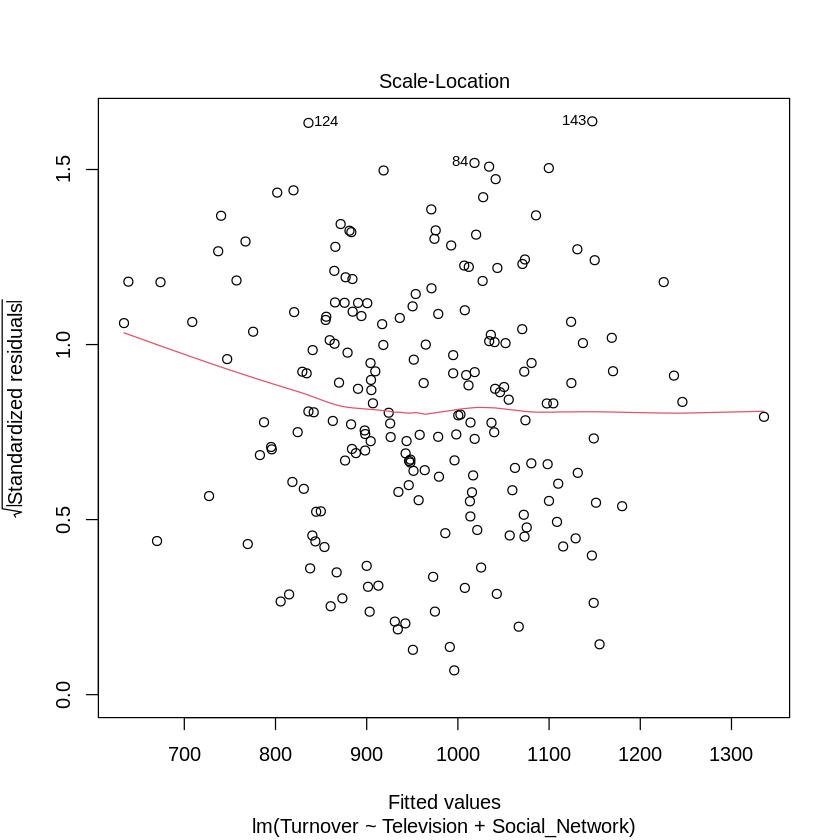

In [19]:
plot(modified_model, 3)

The trendline is relatively horizontal, in which we can say that the resiudals have constant variance.

We can also prove homodescanicity with non-constant variance score test with the hypotheses:

H0: Variance is constant

Ha: Variance is non-constant

In [20]:
ncvTest(modified_model)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2402166, Df = 1, p = 0.62405

P-value > 0.05. Therefore, we retain H0. The assumption of homodescanicity is justified

Finally, we will check if there is collinearity in the model, by looking at the VIF values.

In [21]:
vif(modified_model)

Television Social_Network 
      1.007108       1.007108

As both variables have relatively low VIF (less than 4), there is collinearity between the variables.

With all the assumptions have been justified, we can conclude that the turnover of the firm can be predicted using the formula:

Turnover = 207.06397 + 1.86966 * Television + 2.72971 * Social_Network

(where Television is the cost for television advertisements, and Social_Network is the amount that the company pays for advertising on social media.)